In [1]:
import pandas as pd
import os
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Data Collection and Exploration

Description: This section involves loading the dataset and getting an initial understanding of the data.
    
Tasks:
    
1.Load the dataset using Pandas.

2.Display the first few rows.

3.Check for null values and data types.

4.Get descriptive statistics of the dataset.

In [2]:
files=[file for file in os.listdir(r'C:\Users\DEVEN\Desktop\FINALE\PYTHONN\PROJECT\MONTHLY SALES')]

In [3]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
data=pd.DataFrame()

In [5]:
for file in files:
    df1=pd.read_csv("C:/Users/DEVEN/Desktop/FINALE/PYTHONN/PROJECT/MONTHLY SALES/" +file)
    data=pd.concat([data,df1],ignore_index=True)

In [6]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
data .isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
data=data.dropna()  # dropped nulls

In [9]:
data.info()  # all are object type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
data.duplicated().sum()

618

In [11]:
data.shape

(186305, 6)

In [12]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### Data Preprocessing

Description: Prepare the data for analysis by cleaning and transforming it.

Tasks:

   1.Handling Missing Values: Remove or fill missing data.
   
   2.Data Type Conversion: Convert data types (e.g., dates to datetime).
   
   3.Feature Extraction: Extract additional features like month, hour, etc., from the order date.

   4.Handling Duplicates: Remove duplicate entries if any.

   5.Address Parsing: Separate the purchase address into city, state, and zip code.
                        

In [13]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce')
data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce')
data['Sales']=(data['Quantity Ordered'])*(data['Price Each'])


In [16]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99


In [17]:
data[['City','Zip']]=data['Purchase Address'].str.split(',',expand=True).iloc[:,1:]
data['State']=data['Zip'].str[1:3]
data['Zip']=data['Zip'].str[3:]


In [18]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Zip,State
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,Dallas,75001,TX
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,Boston,02215,MA


In [19]:
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')
data['Month']=pd.to_datetime(data['Order Date'],errors='coerce').dt.month
data['Hour']=pd.to_datetime(data['Order Date'],errors='coerce').dt.hour

In [20]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Zip,State,Month,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,75001,TX,4.0,8.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,02215,MA,4.0,22.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   Sales             185950 non-null  float64       
 7   City              185950 non-null  object        
 8   Zip               185950 non-null  object        
 9   State             185950 non-null  object        
 10  Month             185950 non-null  float64       
 11  Hour              185950 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 18.5+ MB


In [22]:
data.describe()

,Quantity Ordered,Price Each,Sales,Month,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917,7.059140,14.413305
std,0.442793,332.731330,332.919771,3.502996,5.423416
min,1.000000,2.990000,2.990000,1.000000,0.000000
25%,1.000000,11.950000,11.950000,4.000000,11.000000
50%,1.000000,14.950000,14.950000,7.000000,15.000000
75%,1.000000,150.000000,150.000000,10.000000,19.000000
max,9.000000,1700.000000,3400.000000,12.000000,23.000000


In [23]:
data.shape

(186305, 12)

In [24]:
data.isna().sum()

Order ID              0
Product               0
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address      0
Sales               355
City                355
Zip                 355
State               355
Month               355
Hour                355
dtype: int64

In [25]:
data.duplicated().sum()

618

In [26]:
data[data['Order ID']=='176585']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Zip,State,Month,Hour
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston,02215,MA,4.0,11.0
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,Boston,02215,MA,4.0,11.0


In [27]:
data=data.dropna()  # It will dropp NaN,Nat,None
data=data.drop_duplicates()
#data=data.drop(columns='Purchase Address')

In [28]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Zip,State,Month,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,75001,TX,4.0,8.0
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,02215,MA,4.0,22.0
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,90001,CA,4.0,14.0
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,90001,CA,4.0,14.0
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,90001,CA,4.0,9.0


In [29]:
data.shape

(185686, 12)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  float64       
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Sales             185686 non-null  float64       
 7   City              185686 non-null  object        
 8   Zip               185686 non-null  object        
 9   State             185686 non-null  object        
 10  Month             185686 non-null  float64       
 11  Hour              185686 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 18.4+ MB


In [31]:
data=data[data['Order Date'].dt.year==2019]  #very few data for 2020 ,hence kept data for only 2019
data=data.reset_index(drop=True)

In [32]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Zip,State,Month,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,Dallas,75001,TX,4.0,8.0
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,Boston,02215,MA,4.0,22.0
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,Los Angeles,90001,CA,4.0,14.0
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,Los Angeles,90001,CA,4.0,14.0
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,Los Angeles,90001,CA,4.0,9.0


In [33]:
data.to_csv(r'C:\Users\DEVEN\Desktop\FINALE\PYTHONN\PROJECT\Final Submission\Cleaned_Sales_Dataset.csv')

# Exploratory Data Analysis (EDA) and Visualization

Description: Perform analysis and create visualizations to uncover insights.

Tasks:

1.Monthly Sales Analysis:  Analyze sales trends over different months to identify seasonal patterns and peak sales periods.
    
2.State-wise Sales Analysis:  Analyze sales distribution across different states to understand regional performance at a state level.


        
3.City-wise Sales Analysis:  Analyze sales distribution across different cities to understand regional performance and identify high-performing areas.

4.Peak Time Analysis:  Identify peak order times to optimize staffing,inventory management and Advertisement.
  

5.Products Sold Together:  Analyze which products are frequently bought together to identify bundling opportunities and cross-selling strategies
        
6.Product Sales Analysis:  Determine the most and least sold products to identify bestsellers and underperformers.

6.1Correlation Analysis:  Explore the relationship between quantity ordered and price to understand pricing strategies and their impact on sales.


### Question 1: What was the best month for sales? How much was earned that month?

In [34]:
Monthly_Sales=data.groupby('Month')['Sales'].sum().reset_index()
Monthly_Sales['Month']=pd.to_datetime(Monthly_Sales['Month'], format='%m').dt.strftime('%B')

In [35]:
data.groupby('Month')['Sales'].sum().reset_index()

,Month,Sales
0,1.0,1812742.87
1,2.0,2200078.08
2,3.0,2804973.35
3,4.0,3389217.98
4,5.0,3150616.23
5,6.0,2576280.15
6,7.0,2646461.32
7,8.0,2241083.37
8,9.0,2094465.69
9,10.0,3734777.86


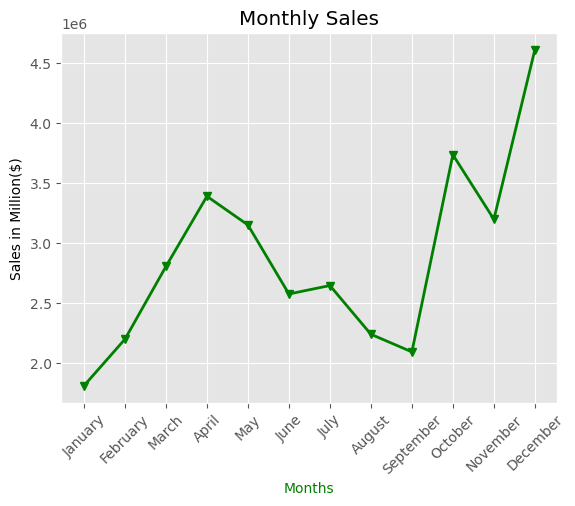

In [36]:
plt.plot(Monthly_Sales['Month'],Monthly_Sales['Sales'],marker='v',linewidth=2,color='g')
plt.xlabel('Months',color='g')
plt.ylabel('Sales in Million($)')
plt.title('Monthly Sales')
plt.xticks(rotation=45)

plt.show()

### Question 2 Identify state with the highest sales to draw attention to its significant contribution.


In [37]:
State=data.groupby('State')['Sales'].sum().reset_index()

In [54]:
fig=px.pie(State, names='State', values='Sales', title='Sales Distribution by State', color='State')
fig.show()

### Question 3: Which city sold the most product?

In [39]:
city=data.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
Qnty=data.groupby('City')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered',ascending=False)

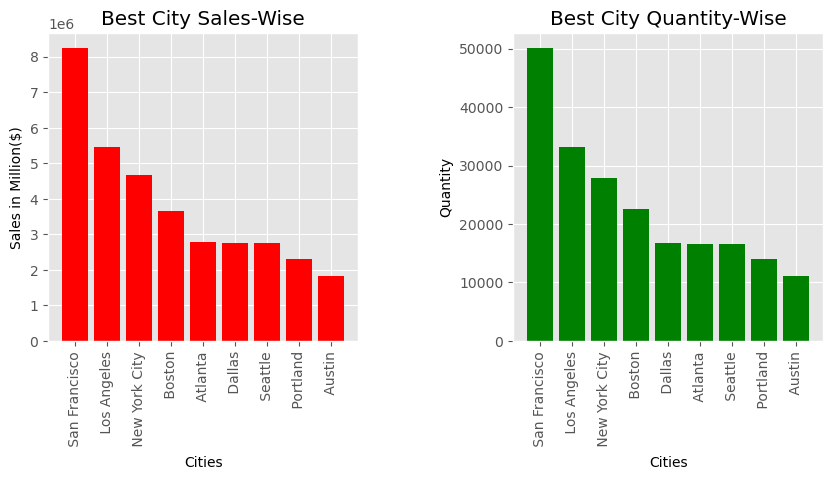

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)                           # made subplot one row two column and assign this plot at 1st position

plt.bar(city['City'],city['Sales'],color='r')
plt.xlabel('Cities')
plt.ylabel('Sales in Million($)')
plt.title('Best City Sales-Wise')
plt.xticks(rotation=90)


plt.subplot(1,2,2)   

# assign this plot at 1st position
plt.bar(Qnty['City'],Qnty['Quantity Ordered'],color='g')
plt.xlabel('Cities')
plt.ylabel('Quantity')
plt.title('Best City Quantity-Wise')
plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.5) # space between two subplots

plt.show()

### Question 4 : At what time should we display advertisements to maximize the likelihood of a customer buying a product?

In [41]:
Advertise=data.pivot_table(index='Hour',values='Product',aggfunc='count').reset_index()
x=np.arange(0,24)

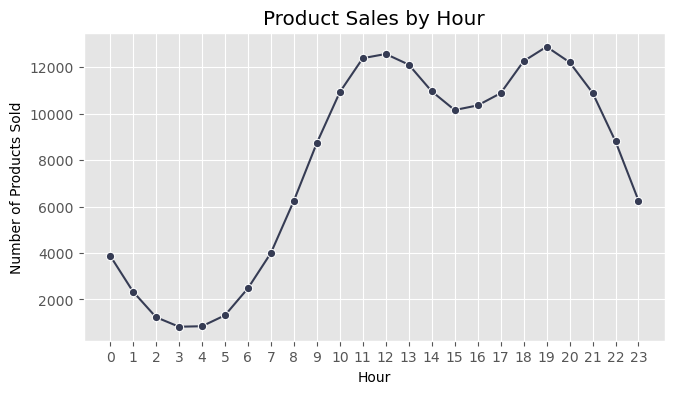

In [42]:
plt.figure(figsize=(7.5, 4))
sns.lineplot(x='Hour', y='Product', data=Advertise, marker='o', color='#363c54')

plt.xticks(np.arange(0, 24))
plt.title("Product Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Number of Products Sold")

plt.show()

### Question 5: What products are most often sold together?

In [43]:
df =data[data['Order ID'].duplicated(keep=False)] # Filter the DataFrame 'df' to get only the rows where 'Order ID' is duplicated

df['Combos'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x)) 
                # Create a new column 'Combos' in 'df'
                # Group the filtered DataFrame by 'Order ID' and then use the transform function
                # The lambda function joins all products for the same 'Order ID' into a single string, separated by commas.

df=df[['Order ID','Combos']].drop_duplicates()
                # Keep only the 'Order ID' and 'Combos' columns, and remove any duplicate rows
df.head(2)

,Order ID,Combos
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"


In [44]:
from collections import Counter
from itertools import combinations

In [45]:
cnt = Counter()            # an empty Counter to count product pairs.     

for row in df['Combos']:    # Go through each row in the 'Combos' column.  
    row_list = row.split(',')   # Split the row into a list of products.
    cnt.update(Counter(combinations(row_list,2)))     # Find all pairs of products in the list.


In [46]:
top10_combos=cnt.most_common(10) #extracted top 10 combos
top10_combos    #single list returned

[(('iPhone', 'Lightning Charging Cable'), 1001),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 359),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [47]:
Top_Combos=pd.DataFrame(top10_combos,columns=['combos','Frequency'])  #created 2 columns and converted into dataframe
Top_Combos

,combos,Frequency
0,"(iPhone, Lightning Charging Cable)",1001
1,"(Google Phone, USB-C Charging Cable)",985
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",413
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",359
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",159
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


In [48]:
Top_Combos['combos']=Top_Combos['combos'].apply(lambda x:str(x))

#cobmos column is tupple dtype/object not a string ,conerted into string

Top_Combos['combos']=Top_Combos['combos'].apply(lambda x:x.replace('(','').replace(')', '').replace("'", '')) 

#replaced brackets '(' &')' and ' with blank

Top_Combos_sorted=Top_Combos.sort_values(by='Frequency').reset_index(drop=True) 

#sorted in ascending

Top_Combos_sorted


,combos,Frequency
0,"Lightning Charging Cable, Wired Headphones",92
1,"Vareebadd Phone, Wired Headphones",143
2,"USB-C Charging Cable, Wired Headphones",159
3,"Google Phone, Bose SoundSport Headphones",220
4,"iPhone, Apple Airpods Headphones",359
5,"Vareebadd Phone, USB-C Charging Cable",361
6,"Google Phone, Wired Headphones",413
7,"iPhone, Wired Headphones",447
8,"Google Phone, USB-C Charging Cable",985
9,"iPhone, Lightning Charging Cable",1001


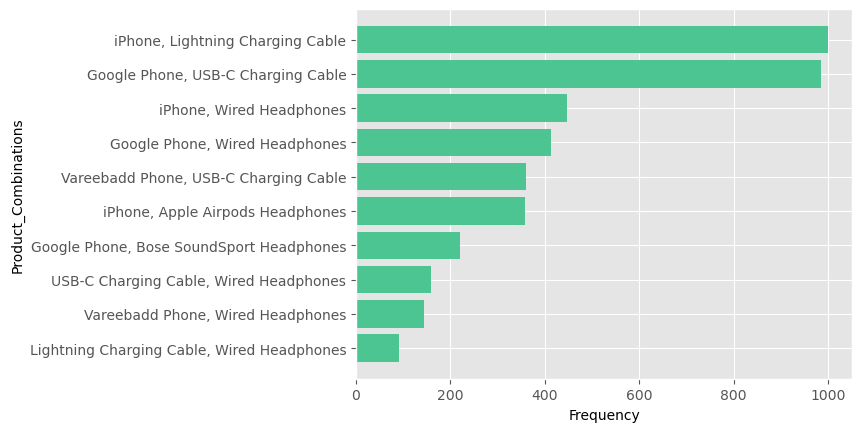

In [49]:
plt.figure()
plt.barh(Top_Combos_sorted['combos'],Top_Combos_sorted['Frequency'].sort_values(ascending=True),color='#4dc592')
plt.xlabel('Frequency')
plt.ylabel('Product_Combinations')
plt.show()

###  Question 6: Which product sold the most?

In [50]:
Best_product=data.groupby('Product')['Quantity Ordered'].sum().reset_index()

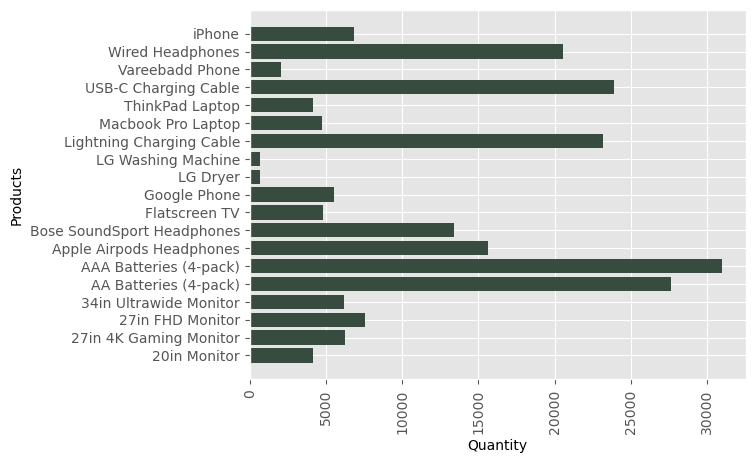

In [51]:
plt.barh(Best_product['Product'],Best_product['Quantity Ordered'],color='#374b3e')
plt.xlabel('Quantity')
plt.ylabel('Products')
# p2.set_xticklabels(price['Product'],rotation=90)
plt.xticks(rotation=90)
plt.show()

### 6.1 : Why those products sold the most?

In [52]:
price=data.pivot_table(index='Product',values='Price Each').reset_index()
price

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


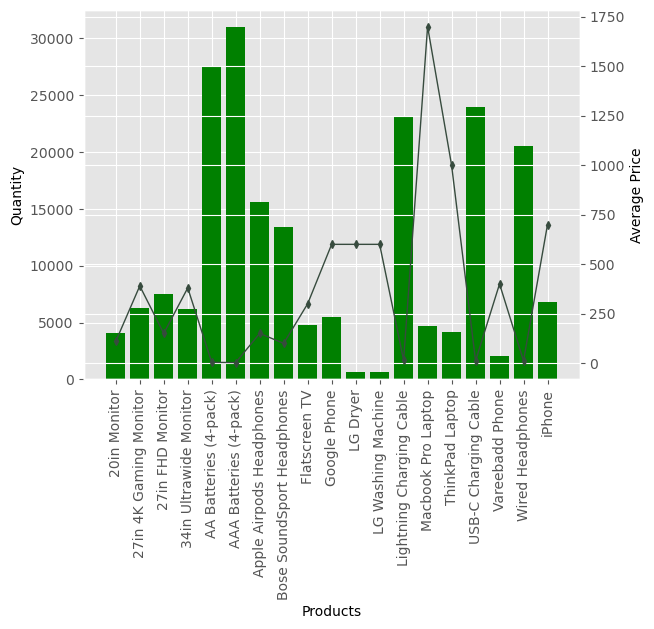

In [53]:
plt.bar(Best_product['Product'],Best_product['Quantity Ordered'],color='g')
plt.ylabel('Quantity')
plt.xlabel('Products')
plt.xticks(rotation=90)

p2=plt.twinx()
plt.plot(price['Product'],price['Price Each'],color='#374b3e',linewidth=1,marker='d',markersize=4)
p2.set_ylabel('Average Price')

plt.show()